In [1]:
# Import necessary packages
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Viz
import matplotlib.pyplot
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt


# evaluation metrics
from scipy.stats import pearsonr
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [2]:

df = pd.read_csv("data_final_with_gng.csv", encoding = "ISO-8859-1") 


In [3]:
print("COLUMN              DATATYPE       EXAMPLE")
print("----------------------------------------------------------------------")
for col in df.columns:
    print(col," "*(18-len(col)),df[col].dtype," "*(8-len(df[col].dtype)),df.iloc[8925][col])

COLUMN              DATATYPE       EXAMPLE
----------------------------------------------------------------------
Race_ID             int64          1487.0
Trap                float64          6.0
Odds                float64          7.0
BSP                 float64          8.63
Public_Estimate     float64          5.0
Last_Run            int64          9.0
Distance_All        float64          380.0
Finish_All          float64          3.13
Distance_Places_All  float64          380.0
Races_All           int64          21.0
Distance_Recent     float64          380.0
Finish_Recent       float64          2.57
Odds_Recent         float64          5.0
Early_Recent        float64          2.43
Races_380           int64          16.0
Wins_380            float64          0.25
Finish_380          float64          2.57
Odds_380            float64          5.0
Early_380           float64          2.43
Grade_380           float64          4.0
Time_380            float64          23.94
Early_Time_3

In [4]:
#df.info()

#### Relativise Features

In [5]:
"""df["Early_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())['Early_Recent']
df["Finish_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())['Finish_Recent']
df["Odds_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())['Odds_Recent']
df["Early_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_380"]
df["Finish_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Finish_380"]
df["Odds_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Odds_380"]
df["Stay_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Stay_380"]
df["Early_Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_Time_380"]
df["Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Time_380"]"""

'df["Early_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())[\'Early_Recent\']\ndf["Finish_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())[\'Finish_Recent\']\ndf["Odds_Recent"] = df.groupby("Race_ID").transform(lambda x: x-x.median())[\'Odds_Recent\']\ndf["Early_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_380"]\ndf["Finish_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Finish_380"]\ndf["Odds_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Odds_380"]\ndf["Stay_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Stay_380"]\ndf["Early_Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Early_Time_380"]\ndf["Time_380"] = df.groupby("Race_ID").transform(lambda x: x-x.median())["Time_380"]'

In [6]:
factors = ['Race_ID','Trap','Odds','BSP','Public_Estimate','Last_Run','Distance_All','Finish_All',
'Distance_Places_All','Races_All','Distance_Recent','Finish_Recent','Odds_Recent','Early_Recent',
'Races_380','Wins_380','Finish_380','Odds_380','Early_380','Grade_380','Time_380','Early_Time_380',
'Stay_380','Favourite','Finished','Wide_380','Dist_By','Gng','Winner']

### Training 

#### Drop Cols

In [7]:
drop_cols = ['Winner','Public_Estimate','Odds','Race_ID']
df_m = df.drop(columns=drop_cols)

In [8]:
train = df_m[0:11670]# Training
test = df_m[11670:]# Final Testing
target="Finished"

train_X = train.drop(columns=[target]) # depedent variable
train_y = train[target] #independent variable
test_X = test.drop(columns=[target])
test_y = test[target]

In [9]:
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X)
train_X_ = scaler.transform(train_X)
test_X_ = scaler.transform(test_X)
train_X = pd.DataFrame(train_X_, index=train_X.index, columns=train_X.columns)
test_X = pd.DataFrame(test_X_, index=test_X.index, columns=test_X.columns)
"""

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(train_X)\ntrain_X_ = scaler.transform(train_X)\ntest_X_ = scaler.transform(test_X)\ntrain_X = pd.DataFrame(train_X_, index=train_X.index, columns=train_X.columns)\ntest_X = pd.DataFrame(test_X_, index=test_X.index, columns=test_X.columns)\n'

In [10]:
model =  GradientBoostingClassifier(n_estimators=10)
model.fit(train_X,train_y)
print("Training Accuracy",round(accuracy_score(train_y, model.predict(train_X)),3))

Training Accuracy 0.265


In [11]:
predicted_fin = model.predict(test_X)
print("Test Accuracy",round(accuracy_score(test_y, predicted_fin),3))

Test Accuracy 0.221


In [12]:
public_y = list(df[11670:]['Public_Estimate'])

In [13]:
print("Public Accuracy",round(accuracy_score(test_y,public_y),3))

Public Accuracy 0.212


### Accuracy for each class

In [14]:
matrix = confusion_matrix(test_y, predicted_fin)
labls = ["First","Second","Third","Fourth","Fifth","Sixth"]
acc_scores = [round(x,2) for x in list(matrix.diagonal()/matrix.sum(axis=1))]
accs = zip(labls,acc_scores)
print("Accuracy Score Each Class")
print("- - - - - - - - - - - - - - - - - - - - ")
for a in accs:
    print(a[0]," "*(9-len(a[0])),a[1])

Accuracy Score Each Class
- - - - - - - - - - - - - - - - - - - - 
First      0.5
Second     0.08
Third      0.11
Fourth     0.12
Fifth      0.14
Sixth      0.39


#### Feature Importances

In [15]:
importances = model.feature_importances_

In [16]:
col_importances = zip(train_X.columns,importances)
col_importances = sorted([(x[0],round(x[1],2)) for x in col_importances], key=lambda x: x[1],reverse=True)

In [17]:
num = 1
for col_imp in col_importances:
    print(num,col_imp[0],(20 - len(col_imp[0]))*" ",col_imp[1])
    print("- - -")
    num+=1

1 BSP                   0.58
- - -
2 Distance_All          0.04
- - -
3 Finish_All            0.04
- - -
4 Time_380              0.04
- - -
5 Races_All             0.03
- - -
6 Races_380             0.03
- - -
7 Early_Time_380        0.03
- - -
8 Stay_380              0.03
- - -
9 Dist_By               0.03
- - -
10 Last_Run              0.02
- - -
11 Distance_Places_All   0.02
- - -
12 Finish_Recent         0.02
- - -
13 Odds_Recent           0.02
- - -
14 Grade_380             0.02
- - -
15 Trap                  0.01
- - -
16 Distance_Recent       0.01
- - -
17 Early_Recent          0.01
- - -
18 Wins_380              0.01
- - -
19 Finish_380            0.01
- - -
20 Odds_380              0.01
- - -
21 Gng                   0.01
- - -
22 Early_380             0.0
- - -
23 Favourite             0.0
- - -
24 Wide_380              0.0
- - -


### Mean Absolute Error

In [18]:
print("Mean Absolute Error")
print("- - - - - - - - - - - - - - -")
print("Model: ",round(mean_absolute_error(test_y,predicted_fin),3))
print("Market:",round(mean_absolute_error(test_y,public_y),3))

Mean Absolute Error
- - - - - - - - - - - - - - -
Model:  1.877
Market: 1.681


### R-squared (Coefficient of Determination)

In [19]:
print("R-squared Score/Error")
print("- - - - - - - - - - - - - - -")
print("Model: ",round(r2_score(test_y,predicted_fin),3))
print("Market:",round(r2_score(test_y,public_y),3))

R-squared Score/Error
- - - - - - - - - - - - - - -
Model:  -0.996
Market: -0.585


### Pearson Correlation of Model Preds/Market Preds and Real Fin Position/Results

#### Model

0.038


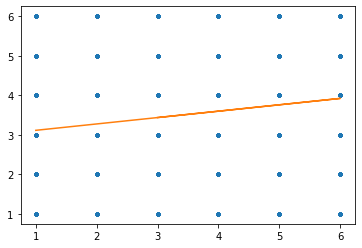

In [20]:
# Sample data
x,y = np.array(predicted_fin),test_y
print(round(pearsonr(predicted_fin,test_y)[0]**2,3))
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

#### Public

0.043


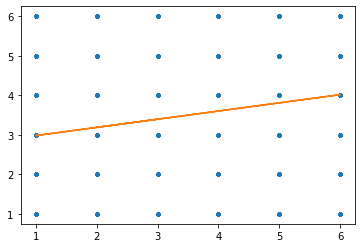

In [21]:
# Sample data
x,y = np.array(public_y), test_y
print(round(pearsonr(public_y,test_y)[0]**2,3))
# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m*x, '-')
plt.show()

In [22]:
the_dict = {'one':0,'two':0,'three':0,'four':0,'five':0,'six':0}

for x in predicted_fin:
    if x ==1:
        the_dict['one']+=1
    elif x ==2:
        the_dict['two']+=1
    elif x ==3:
        the_dict['three']+=1
    elif x ==4:
        the_dict['four']+=1
    elif x ==5:
        the_dict['five']+=1
    elif x ==6:
        the_dict['six']+=1

In [23]:
print(the_dict)

{'one': 748, 'two': 148, 'three': 195, 'four': 265, 'five': 230, 'six': 586}


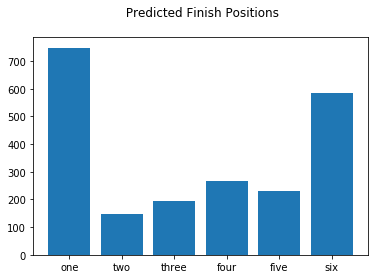

In [24]:
plt.bar(range(len(the_dict)), list(the_dict.values()), align='center')
plt.xticks(range(len(the_dict)), list(the_dict.keys()))
plt.title(" Predicted Finish Positions\n")
plt.show()

### Classification Report

In [25]:
target_names = ['first', 'second', 'third','fourth', 'fifth', 'sixth']
print(classification_report(test_y, predicted_fin, target_names=target_names))

              precision    recall  f1-score   support

       first       0.24      0.50      0.32       362
      second       0.19      0.08      0.11       363
       third       0.19      0.11      0.14       361
      fourth       0.16      0.12      0.14       362
       fifth       0.22      0.14      0.17       362
       sixth       0.24      0.39      0.30       362

    accuracy                           0.22      2172
   macro avg       0.21      0.22      0.20      2172
weighted avg       0.21      0.22      0.20      2172

